# Practical Session 4 - Deep Learning with PyTorch
In this session we will start with our toy task again.
Remember how we solved it with an MLP in the first class ?
We used scikit-learn, a one-liner but without control over what was happening.

We will start by implementing the model in Pytorch, in a basic way.

Then we will work our way to making our code looks like a real Pytorch code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import time

np.random.seed(20)


def base_function(x):
    y = 1.3 * x ** 3 - 3 * x ** 2 + 3.6 * x + 6.9
    return y

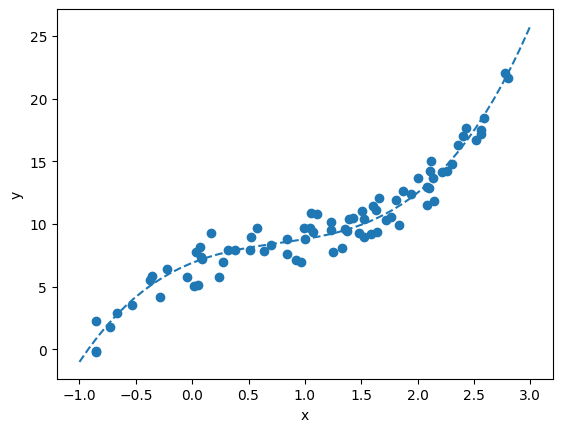

In [2]:

low, high = -1, 3
n_points = 80

# Get the values
xs = np.random.uniform(low, high, n_points)
ys_noise = np.random.normal(size=len(xs))
sample_ys = base_function(xs)
noisy_sample_ys = sample_ys + ys_noise

# Plot the hidden function
lsp = np.linspace(low, high)
true_ys = base_function(lsp)
plt.plot(lsp, true_ys, linestyle='dashed')

# Plot the samples
plt.scatter(xs, noisy_sample_ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We used the following command to fit the regressor last time :
"from sklearn.neural_network import MLPRegressor
 mlp_model = MLPRegressor(max_iter=5000)"

By default, the MLP Regressor makes the following computational graph :
- input gets multiplied by a matrix with 100 parameters, and an additional parameter is added to each values, giving 100 outputs y (shape = (n_samples, 100))
- ReLU is applied to each of these outputs (shape = (n_samples, 100)). The relu function is implemented in PyTorch with torch.nn.functional.relu(x)
- Then this value is multiplied by a matrix to produce a scalar output (again 100 parameters) (shape = (n_samples, 1)) and shifted by an offset.

A quick reminder on matrix multiplication : it is an operation that combines one matrix A of shape (m,n) and a matrix B of shape (n,p) into a matrix C of shape (m,p). In PyTorch (and NumPy), you need to call torch.matmul(A,B) to make this computation.

To make the two big multiplications, we will use one torch tensor of 100 parameters for each multiplication, with the appropriate shape.Create random starting tensors of parameters.

Then implement the asked computation to produce our output from our input. You should debug the operations by ensuring the shapes are correct.

In [3]:
# First create the parameters with small random initial values.
# We need to mention that we want to compute a gradient
# I provide you with the example for the first one, fill the others :
w1 = torch.normal(mean=0., std=0.1, size=(1, 100), requires_grad=True)
b1 = torch.normal(mean=0., std=0.1, size=(1, 100), requires_grad=True)
w2 = torch.normal(mean=0., std=0.1, size=(100, 1), requires_grad=True)
b2 = torch.normal(mean=0., std=0.1, size=(1, 1), requires_grad=True)

In [4]:
# Then define the function
def f(x, weight1=w1, bias1=b1, weight2=w2, bias2=b2):
    step1  = torch.matmul(x, weight1)
    step2 = torch.add(step1, bias1)
    step3 = torch.relu(step2)
    step4 = torch.matmul(step3, weight2)
    out = torch.add(step4, bias2)
    return out


# Just to be sure everything runs, we make an inference on an example input of 6 random values
sample_input = torch.ones(size=(6, 1))
f(sample_input).shape

torch.Size([6, 1])

Now we will mostly use last class optimization procedure to train our network using Pytorch
Fill out the learning loop, inspired by last time's class.
Then plot the resulting model

In [5]:
# Also set up the data
# Check that when doing inference on the data, we get an output tensor of shape (80,1)
# Call us if it is not the case, there is something ~ subtle and not interesting
torch_xs = torch.from_numpy(xs).float()[:, None]
torch_noisy_ys = torch.from_numpy(noisy_sample_ys).float()[:, None]
f(torch_xs).shape

torch.Size([80, 1])

In [6]:
# Now like last time, let us define an optimizer and give the parameters to it.
n_iter = 2000
opt = torch.optim.Adam([w1, b1, w2, b2], lr=0.01)

In [7]:
# Loop over the data, and implement optimization as discussed in class
for i in range(n_iter):
    opt.zero_grad()
    # loss = torch.mean((f(torch_xs) - torch_noisy_ys) ** 2)
    # loss.backward()
    # opt.step()
    # if i % 10 == 0:
    #     print(i, loss.item())

    loss_fn = torch.nn.MSELoss()
    loss = loss_fn(f(torch_xs), torch_noisy_ys)
    loss.backward()
    opt.step()
    if i % 10 == 0:
        print(i, loss.item())

0 119.4442367553711
10 72.21702575683594
20 14.877716064453125
30 7.36355447769165
40 3.5843913555145264
50 3.529980182647705
60 2.8086602687835693
70 2.8532896041870117
80 2.735112428665161
90 2.7008204460144043
100 2.680372953414917
110 2.652355432510376
120 2.624067783355713
130 2.591978073120117
140 2.554959774017334
150 2.511106491088867
160 2.458970785140991
170 2.3979299068450928
180 2.327638626098633
190 2.2507100105285645
200 2.1705410480499268
210 2.090708017349243
220 2.0147604942321777
230 1.940801978111267
240 1.8722116947174072
250 1.804968237876892
260 1.7394376993179321
270 1.668021559715271
280 1.591052532196045
290 1.5089749097824097
300 1.4224958419799805
310 1.3385107517242432
320 1.2643918991088867
330 1.2058650255203247
340 1.1652313470840454
350 1.139514446258545
360 1.1240793466567993
370 1.1140050888061523
380 1.1046626567840576
390 1.0979118347167969
400 1.093348741531372
410 1.0897589921951294
420 1.0830072164535522
430 1.0798057317733765
440 1.07717490196228

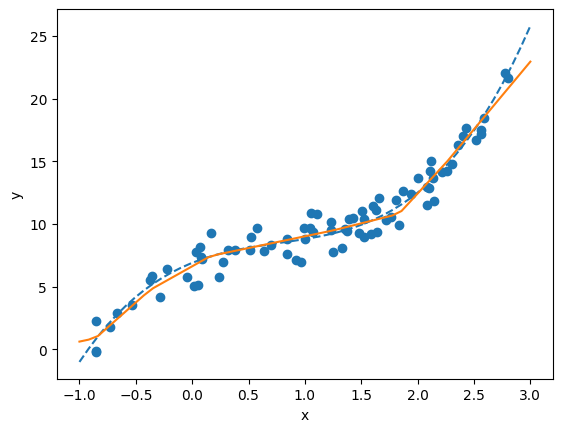

In [8]:
# Let's plot our trained model
torch_lsp = torch.from_numpy(lsp).float()[:, None]
predicted_ys = f(torch_lsp).detach().numpy()

plt.plot(lsp, true_ys, linestyle='dashed')
plt.plot(lsp, predicted_ys)

# Plot the samples
plt.scatter(xs, noisy_sample_ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Congratulations, you have coded yourself a MLP model ! We have used the computation graph framework.


Now let us make our code prettier (more Pytorch) and more efficient.
First let us refactor the model in the proper way it should be coded, by using the torch.nn.Module class.
You should add almost no new code, just reorganize the one above into a class.

In [9]:
from torch.nn import Module, Parameter


class MyOwnMLP(Module):
    def __init__(self):
        super(MyOwnMLP, self).__init__()
        self.w1 = Parameter(torch.normal(mean=0., std=0.1, size=(1, 100)))
        self.b1 = Parameter(torch.normal(mean=0., std=0.1, size=(1, 100)))
        self.w2 = Parameter(torch.normal(mean=0., std=0.1, size=(100, 1)))
        self.b2 = Parameter(torch.normal(mean=0., std=0.1, size=(1, 1)))
        

    def forward(self, x):
        step1  = torch.matmul(x, self.w1)
        step2 = torch.add(step1, self.b1)
        step3 = torch.relu(step2)
        step4 = torch.matmul(step3, self.w2)
        out = torch.add(step4, self.b2)
        return out


model = MyOwnMLP()
out = model(torch_xs)
out.shape

torch.Size([80, 1])

Now we are good to also make the data iteration process look like Pytorch code !

We need to define a Dataset object. Once we have this, we can use it to create a DataLoader object

In [10]:
from torch.utils.data import Dataset, DataLoader


class CustomDataset(Dataset):
    def __init__(self, data_x, data_y):
        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):
        length = len(self.data_x)
        return length

    def __getitem__(self, index):
        # Get the x and y at a given position (index) in the data
        x = self.data_x[index]
        y = self.data_y[index]
        return x, y

In [11]:
# Loop and wait for each data point in PyTorch
dataset = CustomDataset(data_x=torch_xs, data_y=torch_noisy_ys)
dataloader = DataLoader(dataset=dataset, batch_size=10, num_workers=0)
start = time.time()
for point in dataloader:
    pass
print('Done in pytorch : ', time.time() - start)

Done in pytorch :  0.0016629695892333984


The last thing missing to make our pipeline truly Pytorch is to use a GPU.

In Pytorch it is really easy, you just need to 'move' your tensors to a 'device'.
You can test if a gpu is available and create the appropriate device with the following lines:

In [12]:
device = 'gpu' if torch.cuda.is_available() else 'cpu'
torch_xs = torch_xs.to(device)

Now we finally have all the elements to make an actual Pytorch complete pipeline !

Create a model, and try to put it on a device.
Create an optimizer with your model's parameters
Make your data into a dataloader

Then use two nested for loops : one for 100 epochs, and in each epoch loop over the dataloader
    Inside the loop, for every batch first put the data on the device
    Then use the semantics of above :
        - model(batch)
        - loss computation and backward
        - gradient step and zero_grad

In [13]:
# Now we finally have all the elements to make an actual Pytorch complete pipeline !

# Create a model, and try to put it on a device.
# Create an optimizer with your model's parameters
# Make your data into a dataloader

# Then use two nested for loops : one for 100 epochs, and in each epoch loop over the dataloader
#     Inside the loop, for every batch first put the data on the device
#     Then use the semantics of above :
#         - model(batch)
#         - loss computation and backward
#         - gradient step and zero_grad

n_epochs = 200

model = MyOwnMLP()
model = model.to(device)
opt = torch.optim.Adam(model.parameters(), lr=0.01)

dataset = CustomDataset(data_x=torch_xs, data_y=torch_noisy_ys)
dataloader = DataLoader(dataset=dataset, batch_size=10, num_workers=0)

for epoch in range(n_epochs):
    for batch_x, batch_y in dataloader:
        # Don't forget to send to device, the rest is similar to what we had above
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        opt.zero_grad()
        loss = torch.mean((model(batch_x) - batch_y) ** 2)
        loss.backward()
        opt.step()
    if epoch % 10 == 0:
        print(epoch, loss.item())

# Let's plot our trained model
torch_lsp = torch.from_numpy(lsp).float()[:, None]

# To easily use the trained model we need to send it back to cpu at the end
model = model.to('cpu')

0 142.1605224609375
10 4.543466567993164
20 4.463348865509033
30 4.233027458190918
40 3.918450117111206
50 3.558173656463623
60 3.194246292114258
70 2.826509475708008
80 2.464841604232788
90 2.125901460647583
100 1.8393542766571045
110 1.6299594640731812
120 1.4673094749450684
130 1.361522912979126
140 1.3073475360870361
150 1.2697889804840088
160 1.2346124649047852
170 1.2138227224349976
180 1.194770097732544
190 1.1722798347473145


We finally can plot the last model

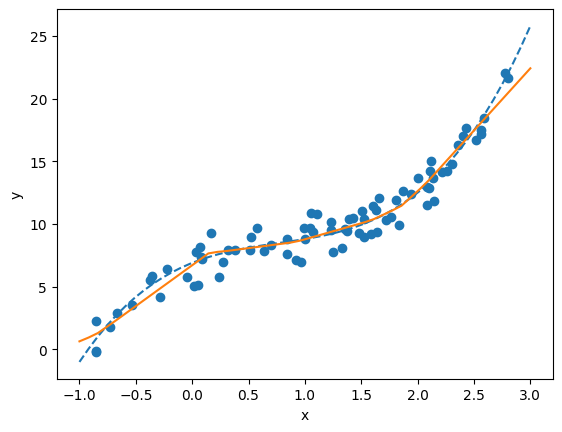

In [14]:
predicted_ys = model(torch_lsp).detach().numpy()

plt.plot(lsp, true_ys, linestyle='dashed')
plt.plot(lsp, predicted_ys)

# Plot the samples
plt.scatter(xs, noisy_sample_ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()